In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/test-file/tested.csv


In [2]:
# Reading the Titanic dataset from a CSV file
titanic_datafile = pd.read_csv('/kaggle/input/test-file/tested.csv')

print(titanic_datafile.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [3]:
# Removing unnecessary columns for my analysis
columns_to_drop = ['Ticket','Fare','Cabin','Embarked']
#Creating a new dataframe after removal of columns above
new_titanic_df = titanic_datafile.drop(columns=columns_to_drop)

In [4]:
print(new_titanic_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  
0                              Kelly, Mr. James    male  34.5      0      0  
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0  
2                     Myles, Mr. Thomas Francis    male  62.0      0      0  
3                              Wirz, Mr. Albert    male  27.0      0      0  
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1  


In [5]:
family_name = ''

# Defining a function to extract family names from the 'Name' column
def get_family_name(name):
  family_name = name.split(',')[0]
  return family_name
# Applying the 'get_family_name' function to each value in the 'Name' column and storing the results in a new column called 'Family_Name'
new_titanic_df['Family_Name'] = new_titanic_df['Name'].apply(get_family_name)

In [6]:
print(new_titanic_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

  Family_Name  
0       Kelly  
1      Wilkes  
2       Myles  
3        Wirz  
4    Hirvonen  


In [7]:
# Calculating the mean age of passengers
mean_age_of_passengers = int(new_titanic_df['Age'].mean())
print(mean_age_of_passengers)

30


In [8]:
# Filling missing age values with the mean age of passengers
new_titanic_df['Age'].fillna(mean_age_of_passengers,inplace=True)
print(new_titanic_df.head(20))

    PassengerId  Survived  Pclass  \
0           892         0       3   
1           893         1       3   
2           894         0       2   
3           895         0       3   
4           896         1       3   
5           897         0       3   
6           898         1       3   
7           899         0       2   
8           900         1       3   
9           901         0       3   
10          902         0       3   
11          903         0       1   
12          904         1       1   
13          905         0       2   
14          906         1       1   
15          907         1       2   
16          908         0       2   
17          909         0       3   
18          910         1       3   
19          911         1       3   

                                                 Name     Sex   Age  SibSp  \
0                                    Kelly, Mr. James    male  34.5      0   
1                    Wilkes, Mrs. James (Ellen Needs)  female  47.

/tmp/ipykernel_19/3478787539.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_titanic_df['Age'].fillna(mean_age_of_passengers,inplace=True)


In [9]:
# Grouping passengers by family name and calculating total members and number of survivors
family_survival = new_titanic_df.groupby('Family_Name').agg(
    TotalMembers=('Name', 'count'),
    Survived=('Survived', 'sum')
).reset_index()

In [10]:
print(family_survival.head())

   Family_Name  TotalMembers  Survived
0       Abbott             1         0
1     Abelseth             2         1
2  Abrahamsson             1         0
3      Abrahim             1         1
4          Aks             1         0


In [11]:
# Filtering families with at least 2 members
family_survival = family_survival[family_survival['TotalMembers'] >= 2]
print(family_survival.head())

   Family_Name  TotalMembers  Survived
1     Abelseth             2         1
8    Andersson             2         1
14     Asplund             4         0
25      Becker             2         2
42       Brown             2         2


In [12]:
# Calculating survival rate for each family
family_survival['SurvivalRate'] = family_survival['Survived'] / family_survival['TotalMembers']

In [13]:
# Assigning survival rate values to the 'SurvivalRate' column
family_survival.loc[:, 'SurvivalRate'] = family_survival['Survived'] / family_survival['TotalMembers']
print(family_survival.head())

   Family_Name  TotalMembers  Survived  SurvivalRate
1     Abelseth             2         1           0.5
8    Andersson             2         1           0.5
14     Asplund             4         0           0.0
25      Becker             2         2           1.0
42       Brown             2         2           1.0


In [14]:
# Defining a function to categorize survival outcomes
def categorize_survival(row):
    if row['Survived'] == 0:
        return 'All Died'
    elif row['Survived'] == row['TotalMembers']:
        return 'All Survived'
    else:
        return 'At least one member survived'

In [15]:
# Applying the categorization function to create a new column for survival outcomes
family_survival['SurvivalOutcome'] = family_survival.apply(categorize_survival, axis=1)
print(family_survival['SurvivalOutcome'].value_counts())

SurvivalOutcome
At least one member survived    31
All Died                        15
All Survived                     7
Name: count, dtype: int64


In [16]:
print(family_survival.head())

   Family_Name  TotalMembers  Survived  SurvivalRate  \
1     Abelseth             2         1           0.5   
8    Andersson             2         1           0.5   
14     Asplund             4         0           0.0   
25      Becker             2         2           1.0   
42       Brown             2         2           1.0   

                 SurvivalOutcome  
1   At least one member survived  
8   At least one member survived  
14                      All Died  
25                  All Survived  
42                  All Survived  


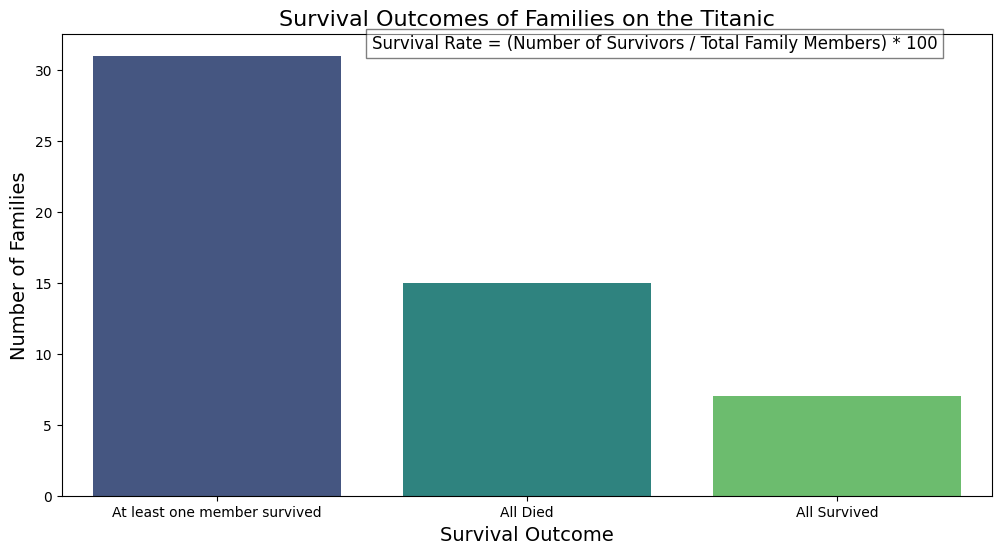

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the figure size
plt.figure(figsize=(12, 6))

# Visualizing survival outcomes of Titanic families
sns.countplot(data=family_survival, x='SurvivalOutcome', palette='viridis')

# Adding title and labels
plt.title('Survival Outcomes of Families on the Titanic', fontsize=16)
plt.xlabel('Survival Outcome', fontsize=14)
plt.ylabel('Number of Families', fontsize=14)

# Adding formula text for survival rate
formula_text = 'Survival Rate = (Number of Survivors / Total Family Members) * 100'
plt.text(0.5, max(family_survival['SurvivalOutcome'].value_counts()) + 1, formula_text,
         horizontalalignment='left',verticalalignment='center_baseline', fontsize=12, color='black', bbox=dict(facecolor='white', alpha=0.5))

plt.show()

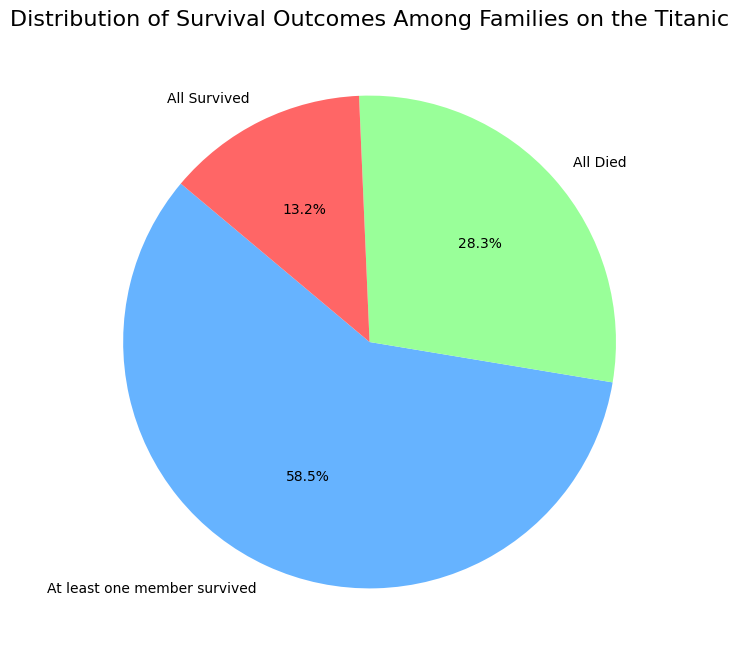

In [18]:
survival_outcome_counts = family_survival['SurvivalOutcome'].value_counts()

# Visualizing distribution of survival outcomes among Titanic families using a pie chart
plt.figure(figsize=(8, 8))
plt.pie(survival_outcome_counts, labels=survival_outcome_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ff6666'])
plt.title('Distribution of Survival Outcomes Among Families on the Titanic', fontsize=16)

plt.show()

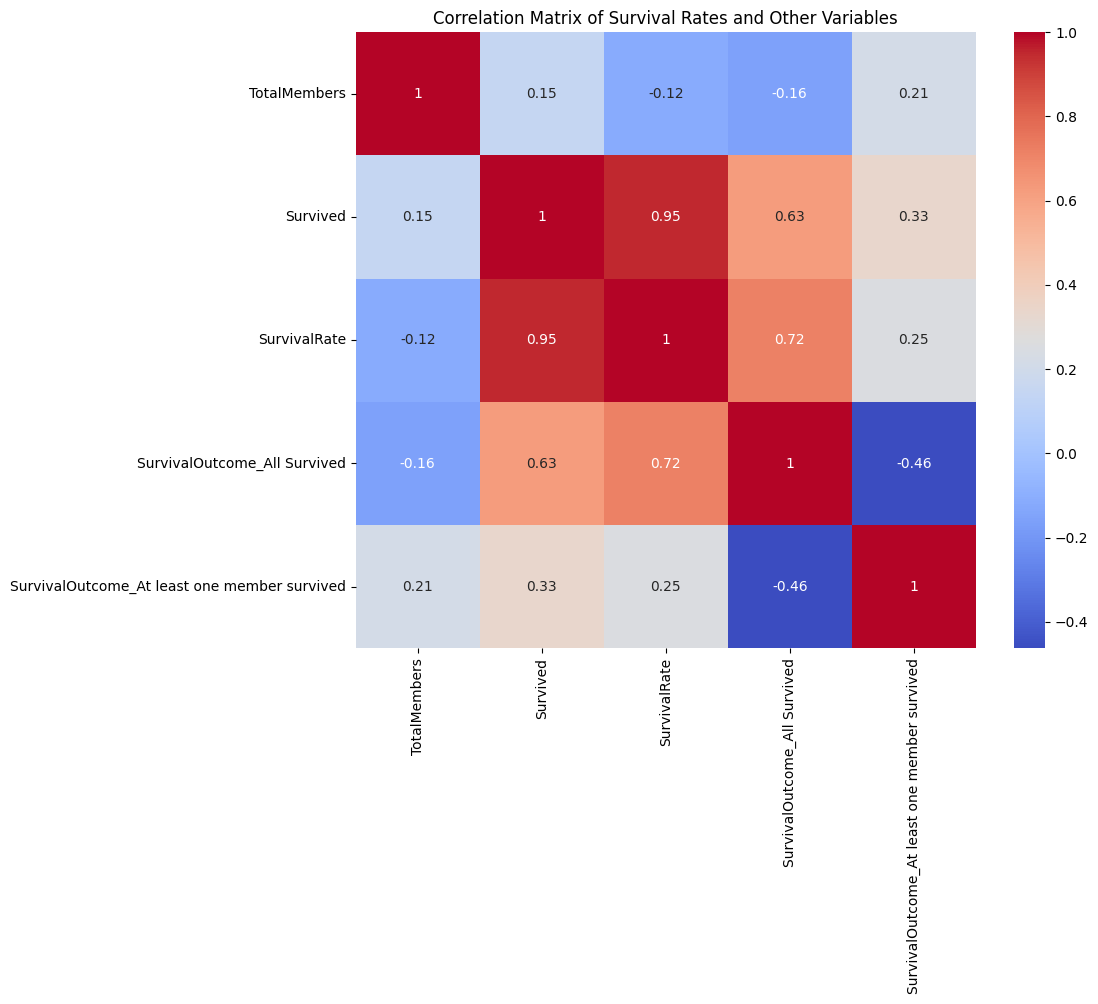

In [19]:
# Dropping the 'Family_Name' column as it contains non-numeric values
family_survival_numeric = family_survival.drop(columns=['Family_Name'])

# Converting all non-numeric columns to numeric using one-hot encoding
family_survival_encoded = pd.get_dummies(family_survival_numeric, drop_first=True)

# Computing correlation matrix between survival rates and other variables
correlation_matrix = family_survival_encoded.corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Survival Rates and Other Variables')
plt.show()

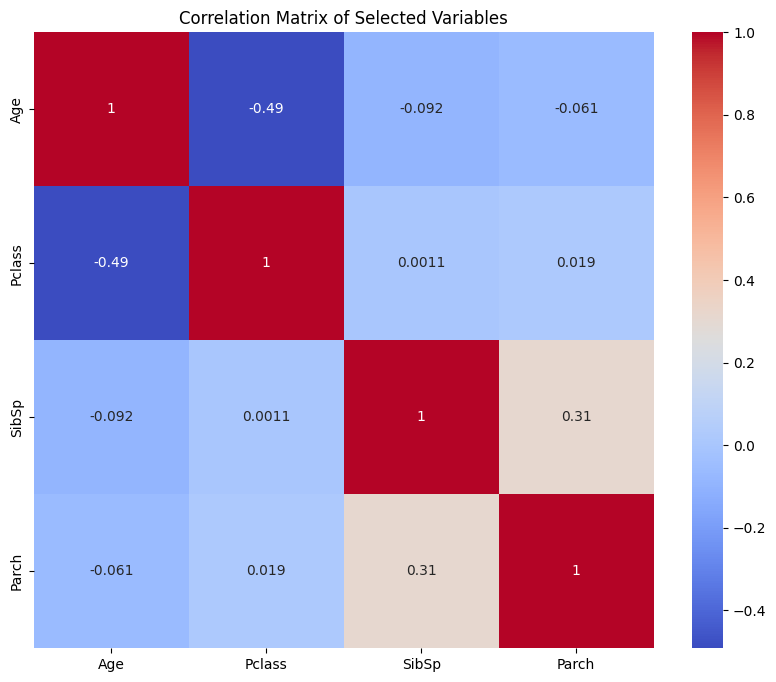

In [20]:
selected_variables = ['Age', 'Pclass', 'SibSp', 'Parch']

# Dropping non-numeric columns or encode categorical variables
selected_data = titanic_datafile[selected_variables]

# Computing correlation matrix
correlation_matrix_selected = selected_data.corr()

# Visualizing correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_selected, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

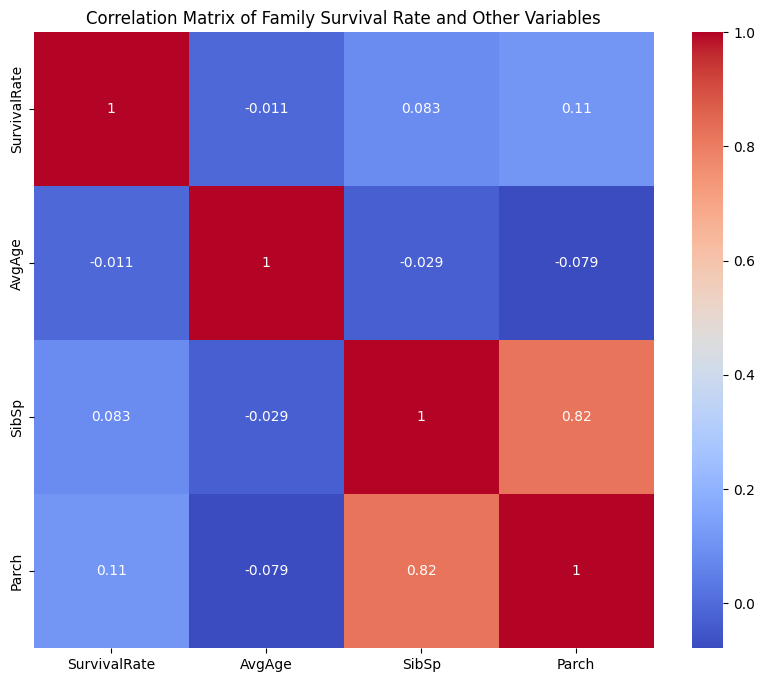

In [21]:
# Grouping Titanic data by family and summarizing features
family_survival = new_titanic_df.groupby('Family_Name').agg(
    TotalMembers=('Name', 'count'),
    Survived=('Survived', 'sum'),
    AvgAge=('Age', 'mean'),  
    SibSp=('SibSp', 'sum'),     
    Parch=('Parch', 'sum')      
).reset_index()
# Calculating survival rate for each family
family_survival['SurvivalRate'] = family_survival['Survived'] / family_survival['TotalMembers']
# Categorizing survival outcome for each family
family_survival['SurvivalOutcome'] = family_survival.apply(categorize_survival, axis=1)
# Encoding categorical variable 'SurvivalOutcome' into dummy variables
family_survival_encoded = pd.get_dummies(family_survival, columns=['SurvivalOutcome'], drop_first=True)

# Dropping 'Family_Name' as it's non-numeric and not useful for correlation
family_survival_encoded = family_survival_encoded.drop(columns=['Family_Name'])

# Computing correlation matrix
correlation_matrix = family_survival_encoded[['SurvivalRate', 'AvgAge', 'SibSp', 'Parch']].corr()

# Visualizing the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Family Survival Rate and Other Variables')
plt.show()

In [22]:
# Removing 'Survived' column from family survival data
family_survival_new = family_survival.drop(columns=['Survived'])
# Merging family survival data with Titanic data based on family name
new_titanic_df = pd.merge(new_titanic_df, family_survival[['Family_Name', 'SurvivalRate', 'SurvivalOutcome']], on='Family_Name', how='left')
print(new_titanic_df.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

  Family_Name  SurvivalRate SurvivalOutcome  
0       Kelly           0.0        All Died  
1      Wilkes           1.0    All Survived  
2       Myles           0.0        All Died  
3        Wirz           0.0        All Died  
4    Hirvonen           1.0    All Survived  


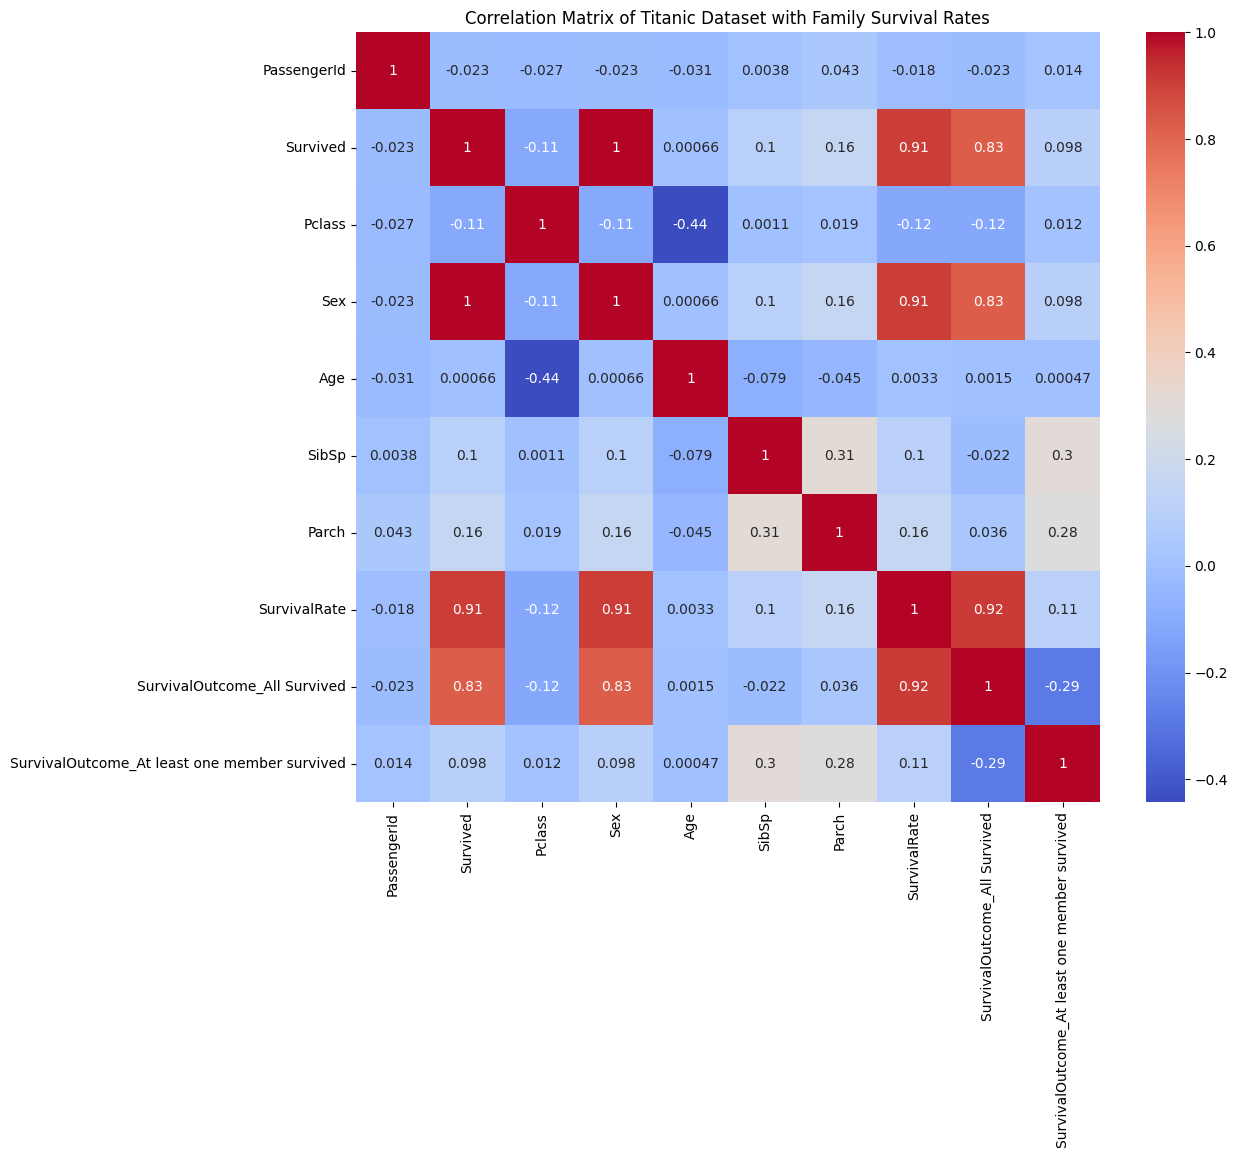

                                              PassengerId  Survived    Pclass  \
PassengerId                                      1.000000 -0.023245 -0.026751   
Survived                                        -0.023245  1.000000 -0.108615   
Pclass                                          -0.026751 -0.108615  1.000000   
Sex                                             -0.023245  1.000000 -0.108615   
Age                                             -0.030935  0.000662 -0.443234   
SibSp                                            0.003818  0.099943  0.001087   
Parch                                            0.043080  0.159120  0.018721   
SurvivalRate                                    -0.017914  0.906457 -0.115473   
SurvivalOutcome_All Survived                    -0.023257  0.829659 -0.115896   
SurvivalOutcome_At least one member survived     0.013812  0.097648  0.012102   

                                                   Sex       Age     SibSp  \
PassengerId                   

In [23]:
# Mapping 'Sex' column to numeric values (0 for male, 1 for female)
new_titanic_df['Sex'] = new_titanic_df['Sex'].map({'male': 0, 'female': 1})
new_titanic_df = pd.get_dummies(new_titanic_df, columns=['SurvivalOutcome'], drop_first=True)
# Dropping 'Name' and 'Family_Name' columns
new_titanic_df = new_titanic_df.drop(columns=['Name', 'Family_Name'])
correlation_matrix = new_titanic_df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Titanic Dataset with Family Survival Rates')
plt.show()
print(correlation_matrix)

1. PassengerId vs. Survived: There doesn't seem to be much of a connection between PassengerId and survival status. It's like they're just random numbers assigned to passengers.

2. PassengerId vs. Pclass: There is not much correlation here either. PassengerId doesn't seem to care about what class people were in.

3. PassengerId vs. Sex: No strong connection between PassengerId and gender. Just because someone's PassengerId is lower or higher doesn't mean they're more likely to be male or female.

4. PassengerId vs. Age: It seems like there's a bit of a scatter here, but not enough to say PassengerId and age are linked. PassengerId is just an identifier after all.

5. Survived vs. Pclass: It looks like there's a bit of a connection between class and survival. Maybe the higher-class passengers had better chances?
 
6. Survived vs. Sex: There's a clear connection between survival and gender. Looks like being female was a big advantage when it came to surviving the Titanic.

7. Survived vs. Age: It doesn't seem like age had much to do with survival. Young or old, it didn't matter much in the end.

8. Survived vs. SibSp: Maybe having siblings or a spouse on board meant you had a better chance of making it?
 
9. Survived vs. Parch: Similar to SibSp, it looks like having parents or children on board gave you a slightly better shot at surviving.
 
10. Survived vs. SurvivalRate: There's a strong connection between survival and the overall survival rate within a family. If your family had a high survival rate, chances are you did too.
 
11. Survived vs. SurvivalOutcome_All Survived: Again, a strong connection here. If everyone in your family survived, you probably did too.
 
11. Survived vs. SurvivalOutcome_At least one member survived: A weaker connection compared to the other outcomes, but still there. If at least one family member survived, you had a slightly better chance of making it.

Overall, it seems like factors like gender and family survival rates played a big role in who survived the Titanic, while things like PassengerId and age didn't matter much in the end.

In [24]:
print(new_titanic_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  SurvivalRate  \
0          892         0       3    0  34.5      0      0           0.0   
1          893         1       3    1  47.0      1      0           1.0   
2          894         0       2    0  62.0      0      0           0.0   
3          895         0       3    0  27.0      0      0           0.0   
4          896         1       3    1  22.0      1      1           1.0   

   SurvivalOutcome_All Survived  SurvivalOutcome_At least one member survived  
0                         False                                         False  
1                          True                                         False  
2                         False                                         False  
3                         False                                         False  
4                          True                                         False  


In [25]:
# Defining age bins and labels
age_bins = [0, 18, 30, 50, 100]
age_labels = ['Child', 'Young Adult', 'Adult', 'Senior']


# Creating a new column 'AgeGroup' based on age bins
new_titanic_df['AgeGroup'] = pd.cut(new_titanic_df['Age'], bins=age_bins, labels=age_labels)
# Calculating family size by summing up 'SibSp', 'Parch', and 1 (for the passenger itself)
new_titanic_df['FamilySize'] = new_titanic_df['SibSp'] + new_titanic_df['Parch'] + 1
# Creating a binary column 'FamilyOnboard' to indicate whether a passenger is traveling with family or not
new_titanic_df['FamilyOnboard'] = (new_titanic_df['FamilySize'] > 1).astype(int)

print(new_titanic_df.head())

   PassengerId  Survived  Pclass  Sex   Age  SibSp  Parch  SurvivalRate  \
0          892         0       3    0  34.5      0      0           0.0   
1          893         1       3    1  47.0      1      0           1.0   
2          894         0       2    0  62.0      0      0           0.0   
3          895         0       3    0  27.0      0      0           0.0   
4          896         1       3    1  22.0      1      1           1.0   

   SurvivalOutcome_All Survived  SurvivalOutcome_At least one member survived  \
0                         False                                         False   
1                          True                                         False   
2                         False                                         False   
3                         False                                         False   
4                          True                                         False   

      AgeGroup  FamilySize  FamilyOnboard  
0        Adult    